<a href="https://colab.research.google.com/github/Dnyansurashe/Ola.Proj/blob/main/sales_predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import seaborn as df3_drop_rows
import random
import

In [3]:
import os
os.getcwd()

'/content'

In [6]:
from google.colab import files


uploaded = files.upload()


Saving salary_data.csv to salary_data.csv


In [8]:
df = pd.read_csv('salary_data.csv')
df

,YearsExperience,Salary,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,Date,STATUS,QTR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,1.1,39343.0,10107.0,30.0,95.70,2.0,2871.00,2/24/2003 0:00,Shipped,1.0,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,1.3,46205.0,10121.0,34.0,81.35,5.0,2765.90,05-07-2003 00:00,Shipped,2.0,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,1.5,37731.0,10134.0,41.0,94.74,2.0,3884.34,07-01-2003 00:00,Shipped,3.0,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,2.0,43525.0,10145.0,45.0,83.26,6.0,3746.70,8/25/2003 0:00,Shipped,3.0,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,2.2,39891.0,10159.0,49.0,100.00,14.0,5205.27,10-10-2003 00:00,Shipped,4.0,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,2.9,56642.0,10168.0,36.0,96.66,1.0,3479.76,10/28/2003 0:00,Shipped,4.0,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
6,3.0,60150.0,10180.0,29.0,86.13,9.0,2497.77,11-11-2003 00:00,Shipped,4.0,...,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small
7,3.2,54445.0,10188.0,48.0,100.00,1.0,5512.32,11/18/2003 0:00,Shipped,4.0,...,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,3.2,64445.0,10201.0,22.0,98.57,2.0,2168.54,12-01-2003 00:00,Shipped,4.0,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
9,3.7,57189.0,10211.0,41.0,100.00,14.0,4708.44,1/15/2004 0:00,Shipped,1.0,...,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium


In [9]:
df.head()

,YearsExperience,Salary,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,Date,STATUS,QTR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,1.1,39343.0,10107.0,30.0,95.70,2.0,2871.00,2/24/2003 0:00,Shipped,1.0,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,1.3,46205.0,10121.0,34.0,81.35,5.0,2765.90,05-07-2003 00:00,Shipped,2.0,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,1.5,37731.0,10134.0,41.0,94.74,2.0,3884.34,07-01-2003 00:00,Shipped,3.0,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,2.0,43525.0,10145.0,45.0,83.26,6.0,3746.70,8/25/2003 0:00,Shipped,3.0,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,2.2,39891.0,10159.0,49.0,100.00,14.0,5205.27,10-10-2003 00:00,Shipped,4.0,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YearsExperience   17 non-null     float64
 1   Salary            18 non-null     float64
 2   ORDERNUMBER       18 non-null     float64
 3   QUANTITYORDERED   18 non-null     float64
 4   PRICEEACH         18 non-null     float64
 5   ORDERLINENUMBER   18 non-null     float64
 6   SALES             18 non-null     float64
 7   Date              18 non-null     object 
 8   STATUS            18 non-null     object 
 9   QTR_ID            18 non-null     float64
 10  MONTH_ID          18 non-null     float64
 11  YEAR_ID           18 non-null     float64
 12  PRODUCTLINE       18 non-null     object 
 13  MSRP              18 non-null     float64
 14  PRODUCTCODE       18 non-null     object 
 15  CUSTOMERNAME      18 non-null     object 
 16  PHONE             18 non-null     object 
 17 

In [11]:
df.isnull().sum()

YearsExperience      8
Salary               7
ORDERNUMBER          7
QUANTITYORDERED      7
PRICEEACH            7
ORDERLINENUMBER      7
SALES                7
Date                 7
STATUS               7
QTR_ID               7
MONTH_ID             7
YEAR_ID              7
PRODUCTLINE          7
MSRP                 7
PRODUCTCODE          7
CUSTOMERNAME         7
PHONE                7
ADDRESSLINE1         7
ADDRESSLINE2        23
CITY                 7
STATE               15
POSTALCODE           9
COUNTRY              7
TERRITORY           16
CONTACTLASTNAME      7
CONTACTFIRSTNAME     7
DEALSIZE             7
dtype: int64

<Axes: >

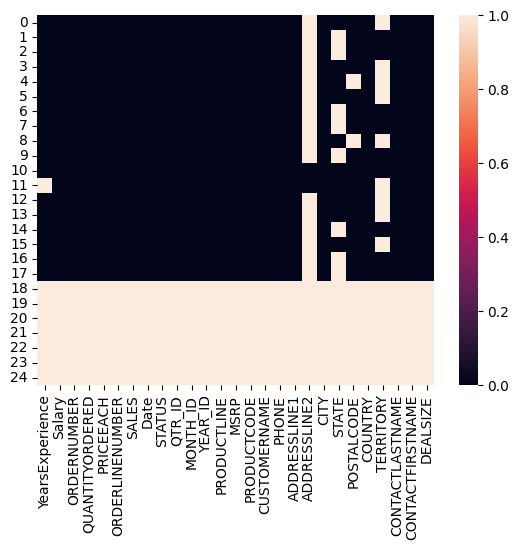

In [14]:
plt.Figure(figsize=(25,25))
sns.heatmap(df.isnull())

In [15]:
x=df.drop('SALES',axis=1)
y=df['SALES']
y

print('Shapes of x=' ,x.shape)
print('Shape of y=' ,y.shape)

Shapes of x= (25, 26)
Shape of y= (25,)


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=51)

print('shape of X_train=', x_train.shape)
print('shape of y_train=', y_train.shape)
print('shape of X_test=', x_test.shape)
print('shape of y_test=', y_test.shape)

shape of X_train= (20, 26)
shape of y_train= (20,)
shape of X_test= (5, 26)
shape of y_test= (5,)


In [24]:
y_test

7     5512.32
10    3965.66
23        NaN
8     2168.54
20        NaN
Name: SALES, dtype: float64

In [27]:
x_test

,YearsExperience,Salary,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,Date,STATUS,QTR_ID,MONTH_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
7,3.2,54445.0,10188.0,48.0,100.00,1.0,11/18/2003 0:00,Shipped,4.0,11.0,...,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
10,3.9,63218.0,10223.0,37.0,100.00,1.0,2/20/2004 0:00,Shipped,1.0,2.0,...,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3.2,64445.0,10201.0,22.0,98.57,2.0,12-01-2003 00:00,Shipped,4.0,12.0,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=3,random_state=0)
x_test.shape

(3, 26)

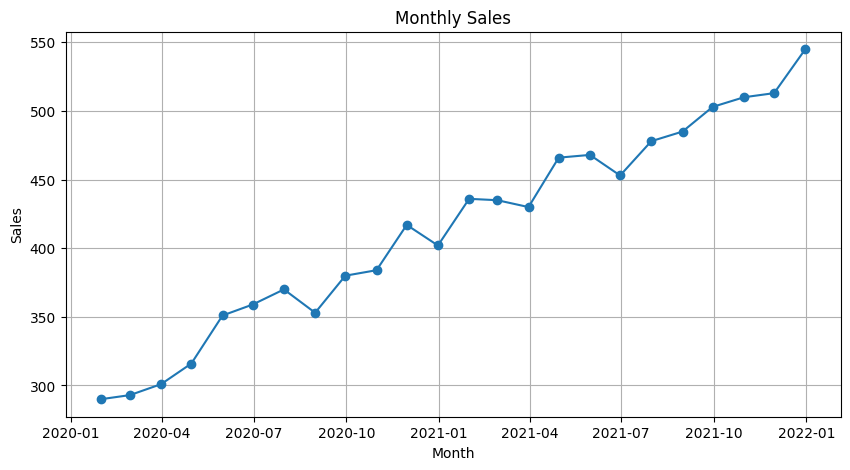

In [32]:
# Create synthetic data
data = {
    'Month': pd.date_range(start='2020-01-01', periods=24, freq='M'),
    'Sales': [300 + i * 10 + np.random.randint(-20, 20) for i in range(24)]
}
df = pd.DataFrame(data)

# Set the 'Month' column as the index
df.set_index('Month', inplace=True)

# Plot the sales data
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Sales'], marker='o')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [36]:
# Extract the month as a feature
df['Month_Num'] = np.arange(len(df))

# Define features (X) and target (y)
X = df[['Month_Num']]
y = df['Sales']

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
classes = ["Tv", "Washing Machine","Fan","Light","Fridge"]
class_student=[45,15,35,25,30]

([<matplotlib.patches.Wedge at 0x7acdbb425e40>,
 [Text(0.6465637441936395, 0.8899187180267095, 'Tv'),
  Text(-0.8816779750143947, 1.2135254213960731, 'Washing Machine'),
  Text(-1.093974074857458, -0.11498140519131432, 'Fan'),
  Text(-0.22870274572881877, -1.075962385074915, 'Light'),
  Text(1.2135256071305074, -0.8816777193728634, 'Fridge')],
 [Text(0.3526711331965306, 0.48541020983275057, '30.0'),
  Text(-0.5877853166762631, 0.809016947597382, '10.0'),
  Text(-0.5967131317404315, -0.06271713010435326, '23.3'),
  Text(-0.12474695221571931, -0.5868885736772262, '16.7'),
  Text(0.8090170714203382, -0.5877851462485756, '20.0')])

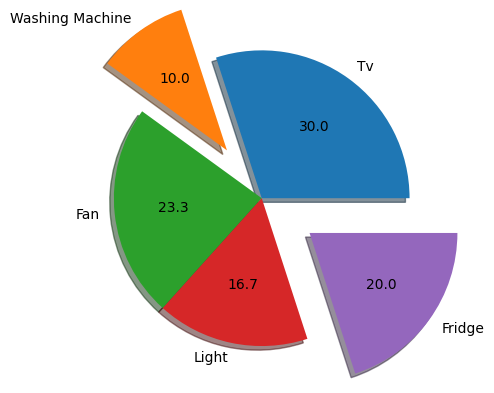

In [40]:
explode=[0,0.4,0,0,0.4]
plt.pie(class_student, labels=classes,explode=explode,shadow=True,autopct="%1.1f")

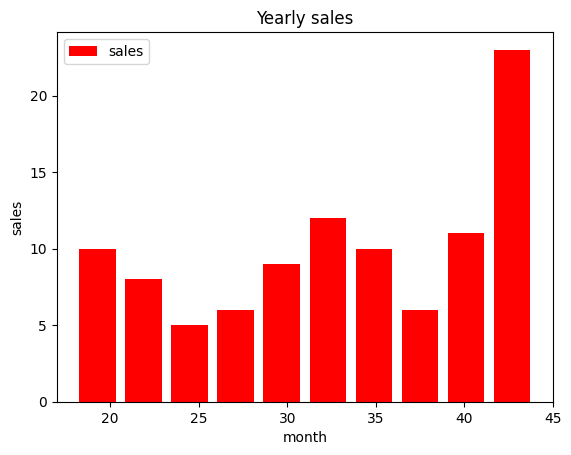

In [41]:
sales=np.random.randint(18,45,(100))
bins =[15,20,25,30,35,49,45]

plt.hist(sales,rwidth=0.8,histtype="bar",orientation="vertical",color="red",label="sales")
plt.title("Yearly sales")
plt.xlabel("month")
plt.ylabel("sales")
plt.legend()
plt.show()

Mean Squared Error: 27.835370606029358


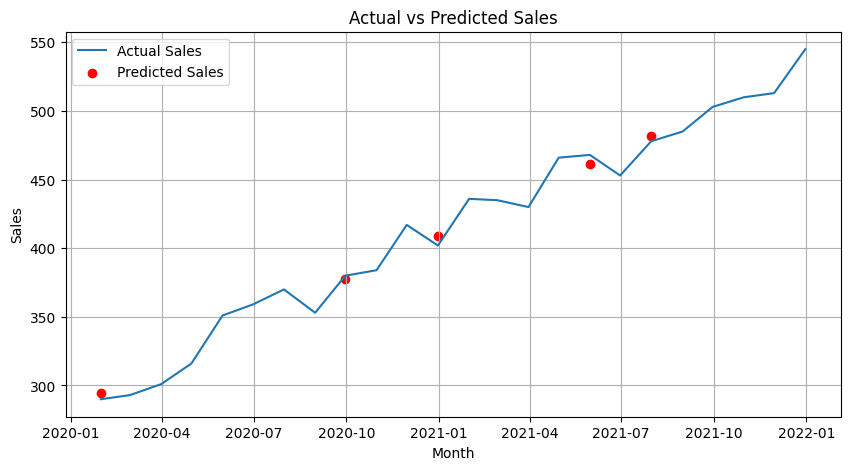

In [42]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Sales'], label='Actual Sales')
plt.scatter(X_test.index, y_pred, color='red', label='Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

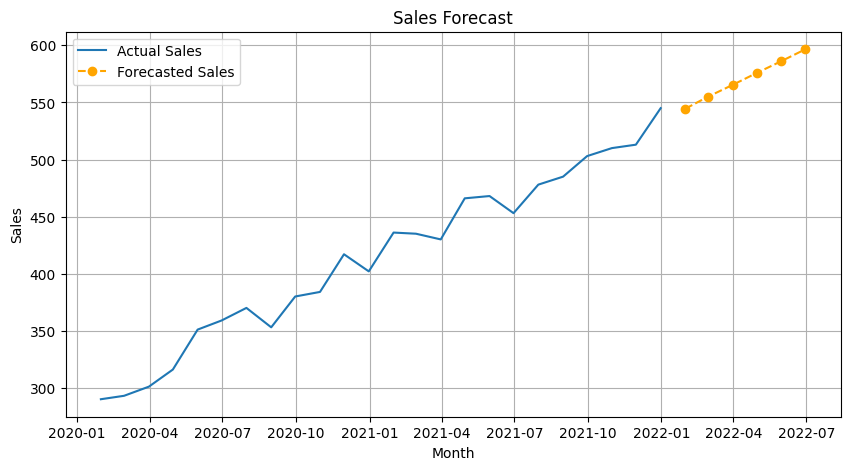

In [43]:
# Create a DataFrame for the next 6 months
future_months = pd.DataFrame({
    'Month_Num': np.arange(len(df), len(df) + 6)
})

# Make predictions
future_sales = model.predict(future_months)

# Create a DataFrame to store the future predictions
future_df = pd.DataFrame({
    'Month': pd.date_range(start=df.index[-1] + pd.offsets.MonthEnd(), periods=6, freq='M'),
    'Predicted_Sales': future_sales
})

# Plot the sales data with the forecast
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Sales'], label='Actual Sales')
plt.plot(future_df['Month'], future_df['Predicted_Sales'], marker='o', linestyle='--', label='Forecasted Sales', color='orange')
plt.title('Sales Forecast')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
Month = ["2020-01","2020-04","2020-07","2020-10","2021-01","2021-04","2021-07","2021-10","2021-01"]
sales1 = [320,310,340,365,350,425,460,485,490]

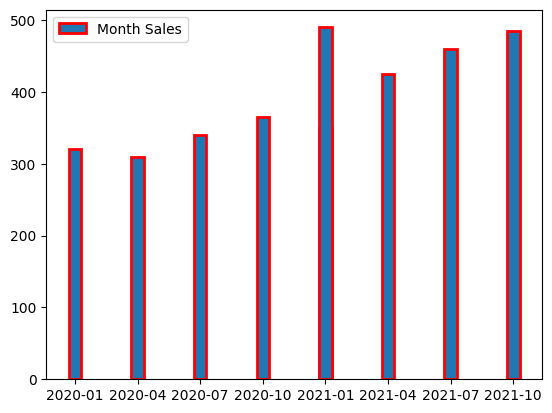

In [45]:
plt.bar(Month,sales1,width=0.2,edgecolor='r',linewidth=2,label="Month Sales")
plt.legend()
plt.show()

In [46]:
print("Thank you.......")

Thank you.......


In [52]:
! jupyter nbconvert --to html sales predication.ipynb

[NbConvertApp] WARNING | pattern 'sales' matched no files
[NbConvertApp] WARNING | pattern 'predication.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    E